*******CUSTOMER ANALYSIS*****

To tackle the customer analysis project, we'll follow these steps:



1.Exploratory Data Analysis (EDA)
2.Data Preprocessing
3.Model Building for Classification and Clustering
4.Evaluation
5.Visualization of Insights

***PROBLEM STATEMENT***



This project aims to enhance its marketing strategies by gaining a deeper understanding of customer behavior and preferences. The company seeks to analyze historical customer data to predict the likelihood of customers accepting marketing campaigns and to segment them effectively. The primary challenge is to develop a robust model that accurately classifies customers based on their response to campaigns and identifies distinct customer segments for targeted marketing efforts. By addressing this challenge aims to optimize its marketing initiatives and improve customer engagement and satisfaction.












***1.Exploratory Data Analysis (EDA)***

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before diving into more advanced analysis. It involves looking at the data, summarizing its main characteristics, and visualizing patterns and relationships within it.

Imagine you have a big box of puzzle pieces (your dataset), and you want to understand what the picture looks like before you start putting the puzzle together. EDA is like sorting through those pieces, organizing them by color or shape, looking for corner pieces, and trying to get a sense of what the final image might be.

During EDA, you might:

Check for missing or unusual values in the data.
Calculate basic statistics like averages, medians, and standard deviations.
Make plots and graphs to visualize the data, like histograms or scatter plots.
Look for patterns or trends in the data, such as correlations between variables or clusters of similar observations.
Identify any potential issues or quirks in the dataset that might affect your analysis.
Overall, EDA helps you get familiar with your data, spot any potential problems early on, and generate insights that can guide your further analysis. It's like taking a good look at the pieces of your puzzle before you start putting them together to reveal the full picture.








   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0             0           0  5524        1957        S1         Lajang   
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  \
0  58138000.0        0         0  04-09-2012  ...                  7   
1  46344000.0        1         1  08-03-2014  ...                  5   
2  71613000.0        0         0  21-08-2013  ...                  4   
3  26646000.0        1         0  10-02-2014  ...                  6   
4  58293000.0        1         0  19-01-2014  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0    

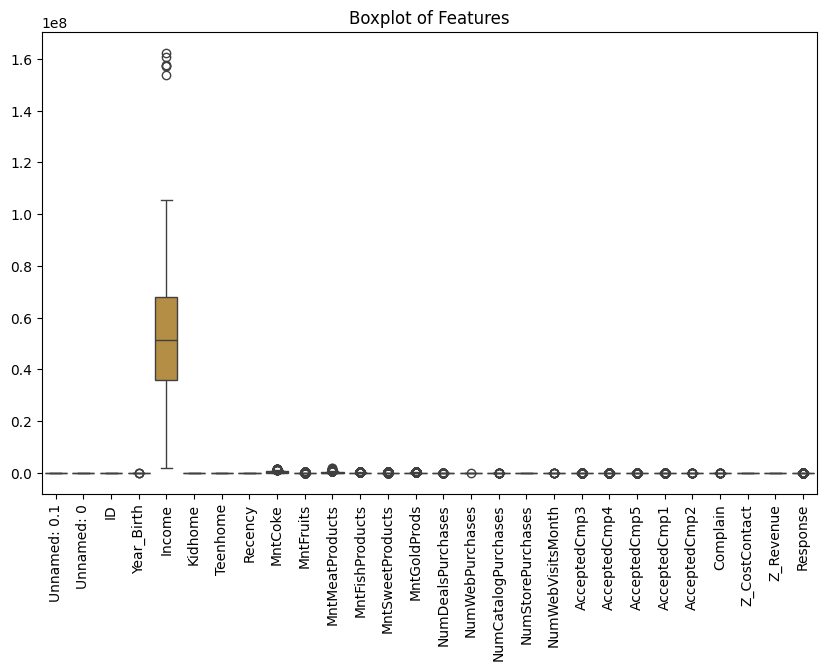

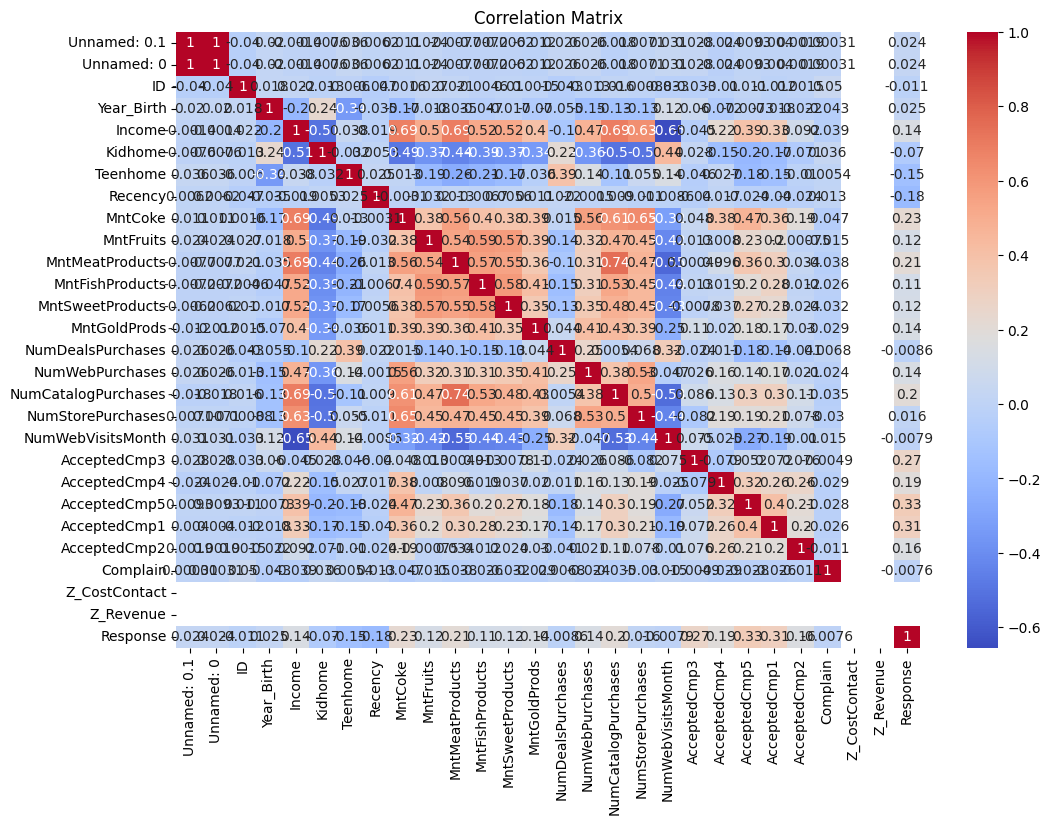

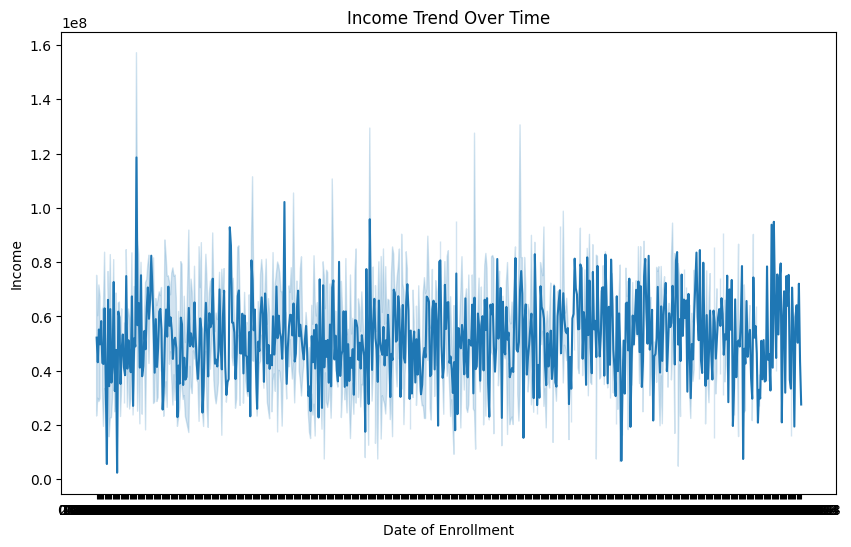

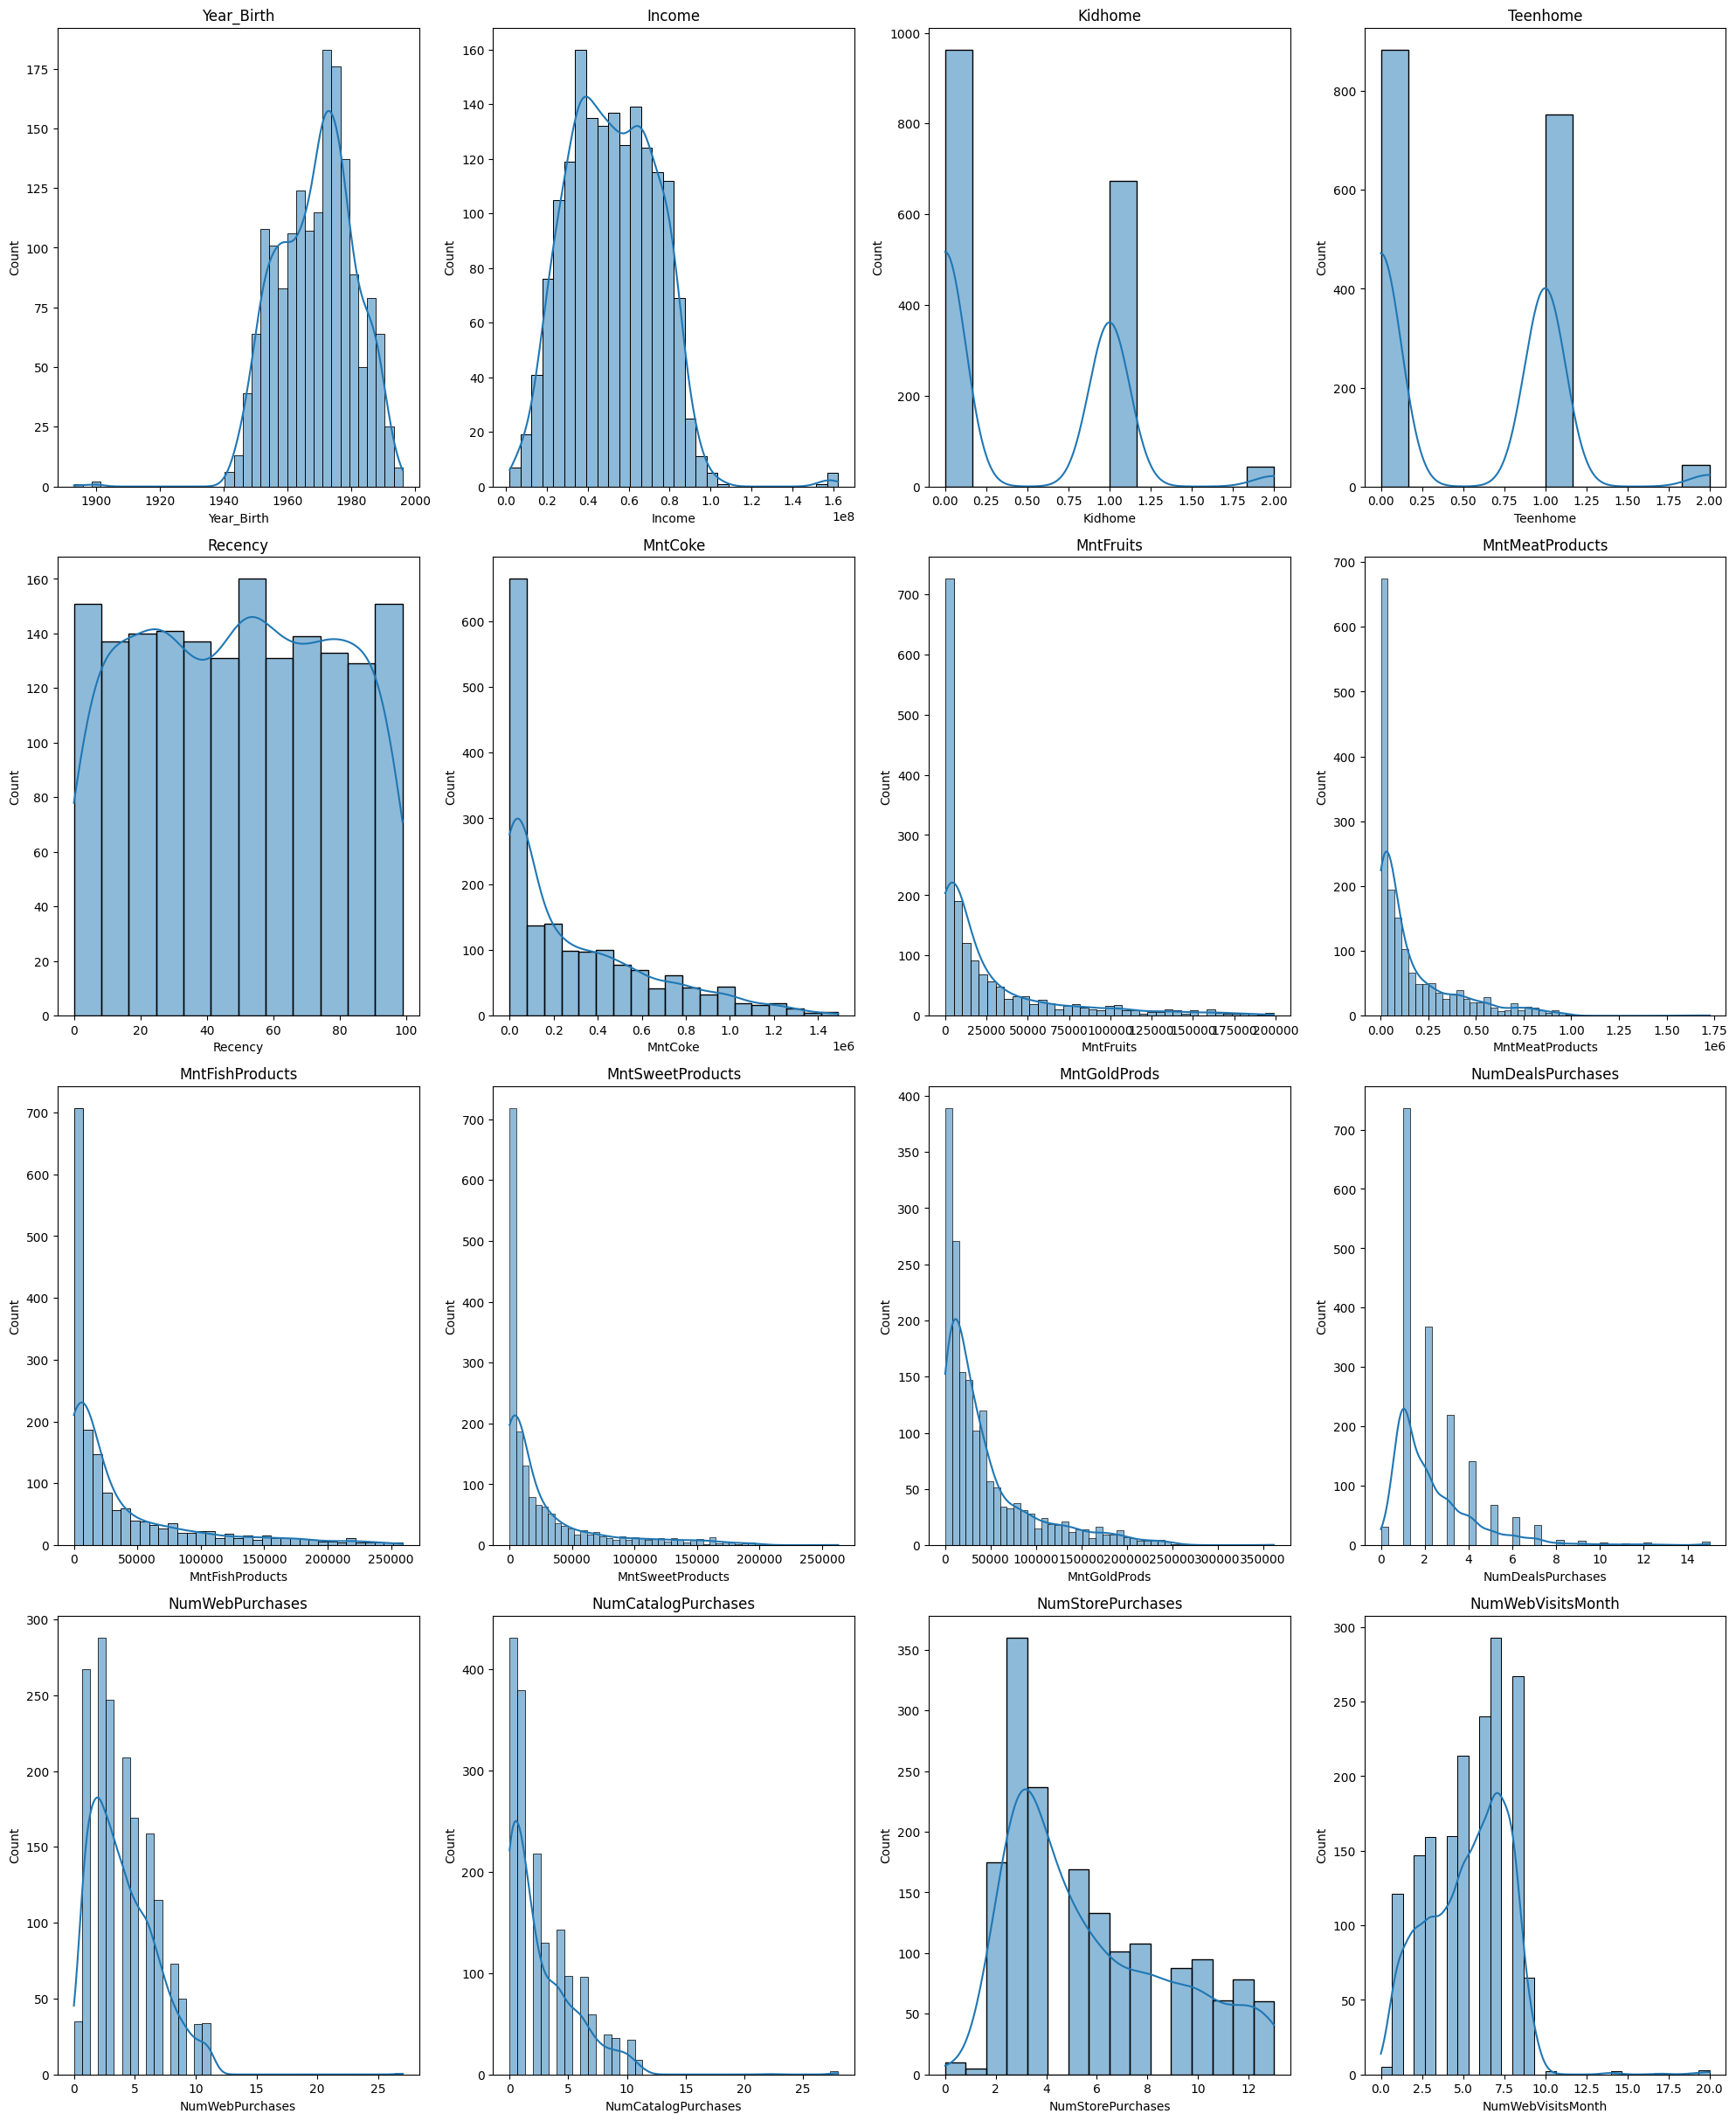

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("customer_train.csv")  # Replace "your_dataset.csv" with the actual file name

# Display the first few rows of the dataset
print(data.head())

# Drop non-numeric columns if present
numeric_data = data.select_dtypes(include=[np.number])

# Summary statistics
print(numeric_data.describe())



# Check for missing values
print(numeric_data.isnull().sum())

# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# Analyze correlations between features

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Visualize trends and patterns in the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Dt_Customer', y='Income', data=data)
plt.title("Income Trend Over Time")
plt.xlabel("Date of Enrollment")
plt.ylabel("Income")
plt.show()

# Visualize distributions of numerical features
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(20, 30))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


Code Explanation:
Importing Libraries: The code begins by importing necessary libraries such as pandas, numpy, matplotlib, and seaborn.

Loading the Dataset: The dataset is loaded using pd.read_csv("customer_train.csv"). It assumes that the dataset is stored in a CSV file named "customer_train.csv". Adjust the file name/path as needed.

Displaying the First Few Rows: print(data.head()) is used to display the first few rows of the dataset. This provides a quick view of the dataset structure and the values in it.

Selecting Numerical Columns: select_dtypes(include=[np.number]) is used to select only the numerical columns from the dataset. This excludes non-numeric columns like strings or categorical variables.

Summary Statistics: numeric_data.describe() provides summary statistics (mean, median, quartiles, etc.) for the numerical columns. This helps in understanding the distribution and range of each numerical feature.

Checking for Missing Values: numeric_data.isnull().sum() checks for missing values in each numerical column. The sum of missing values for each column is displayed.

Checking for Outliers: A boxplot is created using seaborn's boxplot() function to visualize the distribution of numerical features and identify potential outliers.

Analyzing Correlations: A heatmap of correlation matrix is created using sns.heatmap(). This allows visualization of correlations between different numerical features in the dataset.

Visualizing Trends: sns.lineplot() is used to visualize the trend of 'Income' over time (assuming 'Dt_Customer' represents the date of enrollment).

Visualizing Distributions: Histograms of numerical features are created using sns.histplot(). This visualizes the distribution of each numerical feature.

Output Explanation:
The output includes:
The first few rows of the dataset.
Summary statistics for numerical features.
The number of missing values in each numerical column.
Boxplot showing the distribution of numerical features.
Correlation matrix heatmap indicating the correlation between numerical features.
Line plot showing the trend of income over time.
Histograms displaying the distribution of each numerical feature.
These visualizations and summary statistics provide insights into the dataset's structure, distribution of features, presence of outliers, correlations between features, and trends over time. They serve as the initial step in exploratory data analysis (EDA) to understand the dataset better before proceeding with further analysis or modeling.

***2.Data Preprocessing***
Data preprocessing is the initial step in data analysis where you clean and prepare your data for further analysis. It involves transforming raw data into a format that is more suitable for modeling and analysis. Here's a simple explanation of what data preprocessing entails:

Data Cleaning: This involves handling missing values, which could be done by either removing records with missing values or filling them in with estimated values. Additionally, data cleaning might involve removing duplicates, correcting errors, and dealing with outliers.

Data Transformation: This step involves transforming data into a more usable format. For example, converting categorical variables into numerical format through encoding techniques like one-hot encoding, or scaling numerical features to ensure they have similar ranges.

Feature Engineering: Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning algorithms. This could include creating interaction terms, deriving new variables from existing ones, or extracting useful information from text or time data.

Normalization or Standardization: This step ensures that all features have similar scales, which can help machine learning algorithms converge faster and perform better. Normalization scales data to a range of 0 to 1, while standardization transforms data to have a mean of 0 and a standard deviation of 1.

Splitting Data: Before modeling, it's common practice to split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance. This ensures that the model's performance can be accurately assessed on unseen data.

Overall, data preprocessing is essential for ensuring the quality and suitability of data for analysis and  engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("customer_train.csv")  # Replace "customer_train.csv" with the actual file name

# Drop non-numeric columns if present
numeric_data = data.select_dtypes(include=[np.number])

# Step 1: Handle Missing Values
 #Fill missing values with mean
data.fillna(numeric_data.mean(), inplace=True)

# Check if there are any missing values remaining
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 2: Encode Categorical Variables
# Identify categorical columns
categorical_columns = ['Education', 'Marital_Status']
print("Categorical Columns:")
print(categorical_columns)

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# Display the first few rows of the encoded data
print("Encoded Data:")
print(encoded_data.head())

# Step 3: Normalize or Scale Numerical Features
# Scale numerical features using StandardScaler

numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the scaled data
print("Scaled Data:")
print(data.head())

# Combine encoded categorical variables and scaled numerical features
preprocessed_data = pd.concat([encoded_data, data[numerical_columns]], axis=1)

# Step 4: Perform Feature Engineering (Optional)
# Additional feature engineering steps can be added here based on domain knowledge or specific requirements

# Adding a new feature 'TotalSpend' which sums up the spending on all products
data['TotalSpend'] = data['MntCoke'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Creating a new feature 'TotalChildren' which sums up the number of children and teenagers in the household
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']

# Display the first few rows of the data with the new feature
print("Data with New Feature:")
print(data.head())
# print("Data with New Feature:")Display preprocessed data
print("Preprocessed data")
print(preprocessed_data.head())


Missing Values:
Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Categorical Columns:
['Education', 'Marital_Status']
Encoded Data:
   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Income  Kidhome  Teenhome  \
0             0           0  5524        1957  58

***3. Model Building for Classification and Clustering***
Classification:
Use features related to campaign acceptance (AcceptedCmp1 through AcceptedCmp5 and Response) as the target variable.
Select appropriate classification algorithms (e.g., logistic regression, decision trees, random forests).
Split the data into training and testing sets.
Train the models on the training set.
Evaluate the models using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Clustering:
Utilize features related to customer behavior (MntWines, MntFruits, etc.) for clustering.
Select clustering algorithms (e.g., K-means, hierarchical clustering).
Determine the optimal number of clusters using techniques like the elbow method or silhouette score.
Fit the clustering algorithm to the data.
Assign cluster labels to each customer.

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("customer_train.csv")

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Display non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("customer_train.csv")

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Perform one-hot encoding for each non-numeric column
encoded_data = pd.get_dummies(data, columns=non_numeric_columns)

# Display the encoded data
print("Encoded data:")
print(encoded_data.head())


Encoded data:
   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth      Income  Kidhome  Teenhome  \
0             0           0  5524        1957  58138000.0        0         0   
1             1           1  2174        1954  46344000.0        1         1   
2             2           2  4141        1965  71613000.0        0         0   
3             3           3  6182        1984  26646000.0        1         0   
4             4           4  5324        1981  58293000.0        1         0   

   Recency  MntCoke  MntFruits  ...  Dt_Customer_31-03-2013  \
0       58   635000      88000  ...                   False   
1       38    11000       1000  ...                   False   
2       26   426000      49000  ...                   False   
3       26    11000       4000  ...                   False   
4       94   173000      43000  ...                   False   

   Dt_Customer_31-03-2014  Dt_Customer_31-05-2013  Dt_Customer_31-05-2014  \
0                   False                   False

****Evaluation****
Evaluation in the context of machine learning refers to the process of assessing the performance and effectiveness of a trained model on unseen data. It involves using various metrics and techniques to understand how well the model is performing its intended task.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target variable
features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
target = 'Response'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data[features], preprocessed_data[target], test_size=0.2, random_state=42)

# Initialize classification models
logistic_regression_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# Train the models
logistic_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate logistic regression model
accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(logistic_regression_model, X_test, y_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

# Evaluate decision tree model
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(decision_tree_model, X_test, y_test)
print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")

# Evaluate random forest model
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(random_forest_model, X_test, y_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")


Logistic Regression:
Accuracy: 0.8958, Precision: 0.7647, Recall: 0.2955, F1-score: 0.4262
Decision Tree:
Accuracy: 0.8958, Precision: 0.8000, Recall: 0.2727, F1-score: 0.4068
Random Forest:
Accuracy: 0.8988, Precision: 0.8125, Recall: 0.2955, F1-score: 0.4333


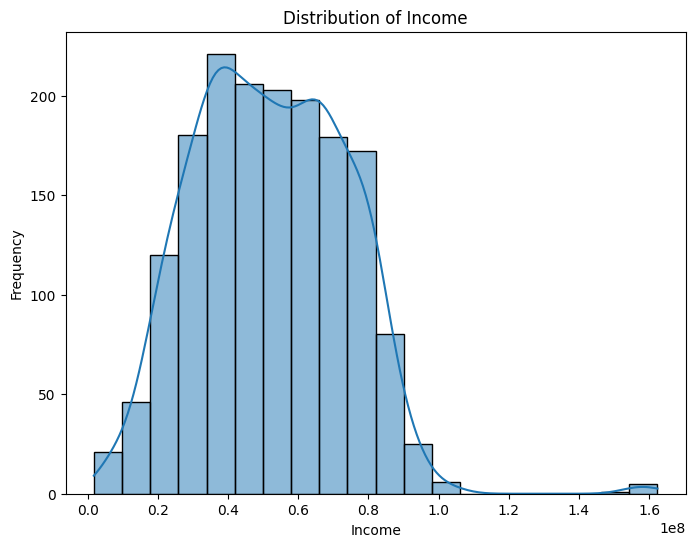

In [6]:
# Visualize trends and patterns identified during EDA
# Example: Histograms, Scatter plots, Heatmaps
# For example, to visualize distribution of 'Income'
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


***These visualizations are useful for evaluating the performance of a classification model. 
The confusion matrix provides insights into the model's predictive accuracy and error types, while the ROC curve and AUC measure the model's ability to distinguish between classes.***


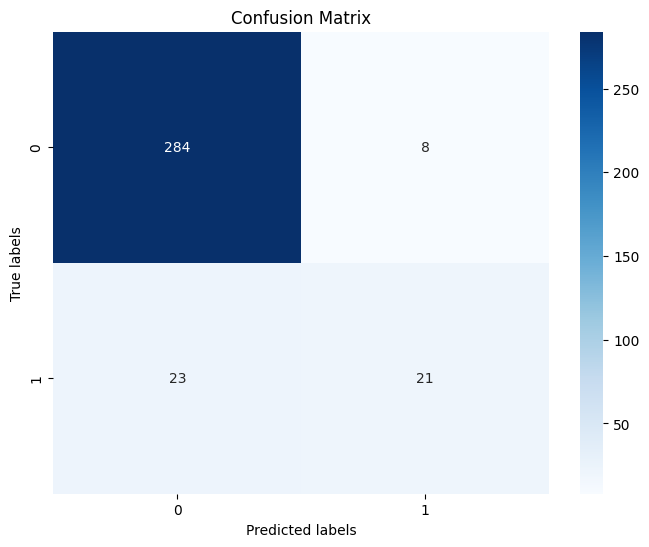

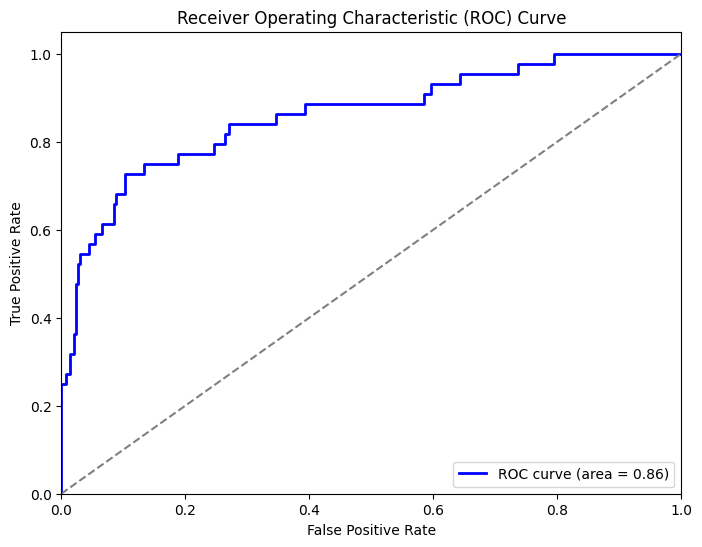

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("customer_train.csv")  # Replace "customer_train.csv" with the actual file name

# Define features and target variable
X = data.drop(columns=["Response"])
y = data["Response"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define logistic regression pipeline
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression())])

# Train the model
clf_pipeline.fit(X_train, y_train)

# Get predictions on the test set
y_pred = clf_pipeline.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for positive class
y_probs = clf_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


***1.Confusion Matrix:***

The confusion_matrix function from sklearn.metrics is used to calculate the confusion matrix based on the true labels (y_test_clf) and the predicted labels (y_pred) of the classification model.
The confusion matrix provides a summary of the model's performance, showing the counts of true positives, true negatives, false positives, and false negatives.
In this code snippet, the confusion matrix is computed and stored in the variable cm.
The heatmap function from seaborn is used to create a heatmap visualization of the confusion matrix. Heatmaps are effective for visualizing tabular data, where colors represent different values.
The annot=True parameter adds the counts as annotations within each cell of the heatmap.
The fmt='d' parameter specifies the format of the annotations as integers.
The cmap='Blues' parameter sets the color map for the heatmap to shades of blue.
Finally, plt.show() displays the heatmap.

***2.ROC Curve:***

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
The roc_curve function from sklearn.metrics computes the ROC curve based on the true labels (y_test_clf) and the predicted probabilities (y_probs) of the positive class.
The predict_proba method of the classifier (clf_pipeline) is used to obtain the predicted probabilities for the positive class.
The fpr (False Positive Rate), tpr (True Positive Rate), and _ (thresholds) are computed and stored based on the true labels and predicted probabilities.
The auc function computes the Area Under the ROC Curve (AUC), which quantifies the overall performance of the classifier.
The ROC curve and AUC are then plotted using Matplotlib.
The plot includes a diagonal line representing random guessing, and the ROC curve of the classifier is plotted over it.
The legend displays the AUC value.
Finally, plt.show() displays the ROC curve plot.

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv("customer_train.csv")

# Verify column names
expected_columns = ['Education', 'Marital_Status', 'Dt_Customer']
missing_columns = [col for col in expected_columns if col not in data.columns]

if missing_columns:
    print("Error: The following columns are missing in the dataset:", missing_columns)
else:
    # Proceed with your data preprocessing and analysis code here
    print("All expected columns are present in the dataset. Proceed with further processing.")


All expected columns are present in the dataset. Proceed with further processing.


In [12]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


***CLUSTERING***



clustering is a technique used for grouping a set of data points into subsets or clusters based on the similarity between the data points within each cluster. The goal of clustering is to partition data into groups such that data points within each group are more similar to each other than to those in other groups. Clustering is an unsupervised learning technique, meaning it doesn't require labeled data for training.



***Key Concepts in Clustering:***



Distance Metrics: Clustering algorithms often rely on distance metrics to measure the similarity or dissimilarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity.

Centroid-Based Clustering: In centroid-based clustering algorithms like K-means, clusters are represented by a central point called a centroid. The algorithm iteratively assigns data points to the nearest centroid and updates the centroids until convergence.

Density-Based Clustering: Density-based clustering algorithms, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise), group together data points that are closely packed and separate regions of high density from regions of low density.

Hierarchical Clustering: Hierarchical clustering builds a hierarchy of clusters, either bottom-up (agglomerative) or top-down (divisive), by recursively merging or splitting clusters based on certain criteria, such as distance or linkage.

Evaluation Metrics: Various metrics can be used to evaluate the quality of clustering results, such as silhouette score, Davies–Bouldin index, and the Dunn index. These metrics help assess the compactness and separation of c



Here we do clustering using two algorithms i.e K-means and Agglomerative algorithm.
1. K-means


K-means is a popular clustering algorithm that aims to partition a dataset into K clusters. It works by iteratively assigning data points to the nearest centroid and updating the centroids based on the mean of the data points in each cluster. K-means is efficient and works well for datasets with spherical clusters and similar sizes. However, it requires specifying the number of clusters beforehand and is sensitive to the initial placement of centroids.lusters.


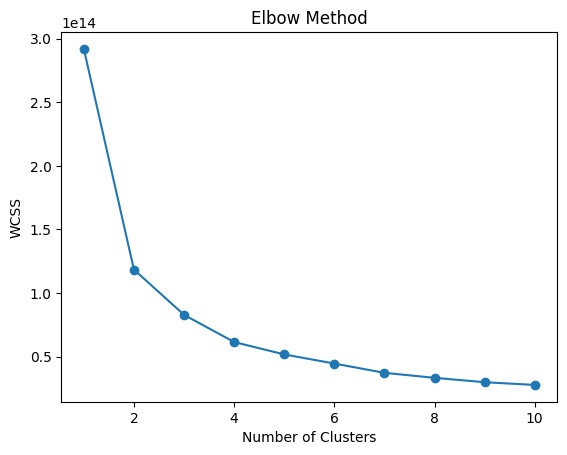

Cluster Centers:
         MntCoke     MntFruits  MntMeatProducts  MntFishProducts  \
0   69468.553459   8783.018868     35860.587002     12169.811321   
1  433131.078224  47177.589852    306803.382664     69752.642706   
2  952913.043478  50786.561265    391980.237154     69094.861660   

   MntSweetProducts  MntGoldProds  
0       8750.524109  22373.165618  
1      51289.640592  70695.560254  
2      50513.833992  71256.916996  
Silhouette Score: 0.5376493316469265


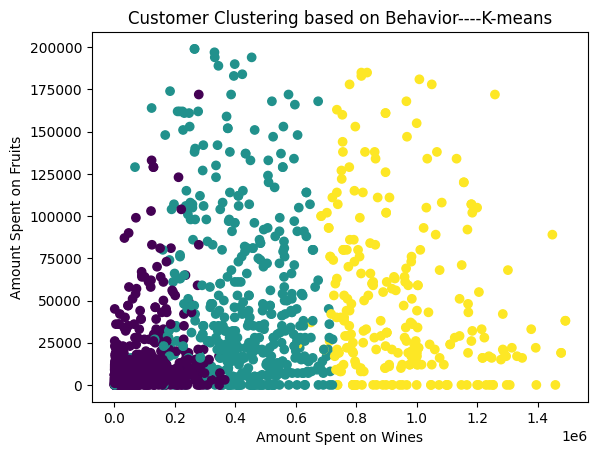

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("customer_train.csv")  # Replace "customer_train.csv" with the actual file name

# Select features related to customer behavior for clustering
behavior_features = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

X = data[behavior_features]

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means clustering with the optimal number of clusters
optimal_clusters = 3  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

# Assign cluster labels to each customer
data['Cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=behavior_features))

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters (assuming 2D features for simplicity)
plt.scatter(X['MntCoke'], X['MntFruits'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Fruits')
plt.title('Customer Clustering based on Behavior----K-means')
plt.show()



2. Agglomerative Algorithm

Cluster Centers:
         MntCoke     MntFruits  MntMeatProducts  MntFishProducts  \
0   69468.553459   8783.018868     35860.587002     12169.811321   
1  433131.078224  47177.589852    306803.382664     69752.642706   
2  952913.043478  50786.561265    391980.237154     69094.861660   

   MntSweetProducts  MntGoldProds  
0       8750.524109  22373.165618  
1      51289.640592  70695.560254  
2      50513.833992  71256.916996  
Silhouette Score: 0.5376493316469265


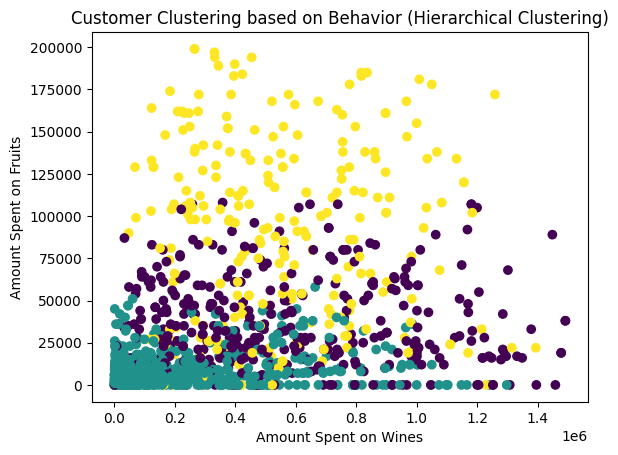

In [6]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("customer_train.csv")  # Replace "customer_train.csv" with the actual file name

# Select features related to customer behavior for clustering
behavior_features = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

X = data[behavior_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_cluster.fit(X_scaled)

# Assign cluster labels to each customer
data['Cluster'] = agg_cluster.labels_


# Print the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=behavior_features))

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters (assuming 2D features for simplicity)
plt.scatter(X['MntCoke'], X['MntFruits'], c=agg_cluster.labels_, cmap='viridis')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Fruits')
plt.title('Customer Clustering based on Behavior (Hierarchical Clustering)')
plt.show()


Hyperparameter Tuning


Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are settings that are external to the model itself and cannot be directly learned from the training data. They control aspects of the learning process, such as the complexity of the model, the learning rate, or the regularization strength.

Hyperparameter tuning is essential because choosing the right hyperparameters can significantly impact the performance of the model. It involves selecting a range of values for each hyperparameter and then systematically searching through these values to find the combination that yields the best performance according to a chosen evaluation metric.

In [27]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("customer_train.csv")

# Define features and target variable
X = data.drop(columns=["Response"])
y = data["Response"]

# Define preprocessing steps for numerical and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define logistic regression pipeline
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression())])

# Define hyperparameter grid
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate best model
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy of Best Model:", accuracy)


C:\Users\NIKHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NIKHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Best Hyperparameters: {'classifier__C': 0.1}
Accuracy of Best Model: 0.893452380952381


Best Hyperparameters: {'classifier__C': 0.1}

This means that the best value for the regularization parameter (C) found during the grid search is 0.1. In logistic regression, the regularization parameter C controls the strength of regularization, where smaller values specify stronger regularization.
The 'classifier__C' key indicates that the hyperparameter belongs to the 'classifier' step of the pipeline, specifically to the logistic regression model.
Accuracy of Best Model: 0.893452380952381

This is the accuracy achieved by the best model identified during the hyperparameter tuning process.
It indicates the proportion of correctly predicted instances out of the total number of instances in the dataset.
In this case, the best model achieved an accuracy of approximately 89.35%.